## Task-D: Collinear features and their effect on linear models

In [316]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [317]:
data = pd.read_csv('task_d.csv')

In [318]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [319]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

feature_lst = list(data.columns.values)
print(feature_lst)

['x', 'y', 'z', 'x*x', '2*y', '2*z+3*x*x', 'w', 'target']


### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

<AxesSubplot:>

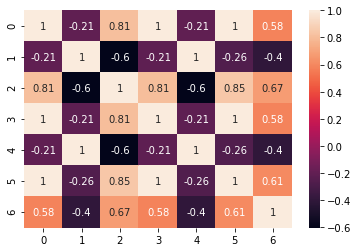

In [320]:
df = pd.DataFrame(X)
#https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07
sns.heatmap(df.corr() , annot = True)

Logistic Regression

In [321]:
log_res = SGDClassifier(loss = 'log')
params = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
clf = GridSearchCV(log_res , params ,cv =3)
clf.fit(X,Y)

clf.best_params_

{'alpha': 0.0001}

In [322]:
best_model = SGDClassifier(loss = 'log' , alpha = 0.0001)
best_model.fit(X,Y)

best_model_accuracy = accuracy_score(Y , best_model.predict(X) ) 
w = best_model.coef_
print(best_model_accuracy , w)

1.0 [[  6.98723076 -11.06945882  17.99357874   6.48311605 -11.06945882
    8.00726825   1.36777686]]


In [323]:
X_new= X + 0.01

best_model.fit (X_new , Y)

best_model_accuracy_edited = accuracy_score(Y ,best_model.predict(X_new)) 
w_dash = best_model.coef_
print(best_model_accuracy_edited  , w_dash)

1.0 [[ 3.18915299 -2.74640032  5.70732449  3.12942582 -2.74640032  3.50515689
   5.48731939]]


In [324]:
acc_diff = best_model_accuracy_edited - best_model_accuracy
w_diff = w_dash - w
w_per = np.absolute(((w_dash - w)/w_dash)*100).flatten()

print("Accuracy Difference : " , acc_diff,"\n")
print("Difference in weights (w' - w) : \n",w_diff)
print("\nPercentage difference in weights : \n",w_per)

idx_top_4 = w_per.argsort()[-4:][::-1]

features = []
for i in idx_top_4:
    features.append(feature_lst[i])
    
print("\nTop 4 features by percentage change : ",features)

Accuracy Difference :  0.0 

Difference in weights (w' - w) : 
 [[ -3.79807777   8.3230585  -12.28625425  -3.35369023   8.3230585
   -4.50211136   4.11954253]]

Percentage difference in weights : 
 [119.09362078 303.05336202 215.27169648 107.16631185 303.05336202
 128.44250609  75.07386101]

Top 4 features by percentage change :  ['2*y', 'y', 'z', '2*z+3*x*x']


Observations :
    
1. By adding a small noise in the data , the weights change by a significant percentage.

Linear SVM

In [326]:
lr_svm = SGDClassifier(loss = 'hinge')
params = {'alpha':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
clf = GridSearchCV(lr_svm , params ,cv =3)
clf.fit(X,Y)

clf.best_params_

{'alpha': 0.001}

In [327]:
best_model = SGDClassifier(loss = 'hinge' , alpha = 0.001)
best_model.fit(X,Y)

best_model_accuracy = accuracy_score(Y , best_model.predict(X) ) 
w = best_model.coef_
print(best_model_accuracy , w)

1.0 [[ 2.78294456 -2.86831039  6.70391776  2.19749391 -2.86831039  2.7871434
   1.16471531]]


In [381]:
X_new= X + 0.01

best_model.fit (X_new , Y)

best_model_accuracy_edited = accuracy_score(Y ,best_model.predict(X_new)) 
w_dash = best_model.coef_
print(best_model_accuracy_edited  , w_dash)

1.0 [[ 2.56392579 -1.66217536  4.86577501  2.30428622 -1.66217536  2.66109795
   1.31261022]]


In [382]:
acc_diff = best_model_accuracy_edited - best_model_accuracy
w_diff = w_dash - w
w_per = np.absolute(((w_dash - w)/w_dash)*100).flatten()

print("Accuracy Difference : " , acc_diff,"\n")
print("Difference in weights (w' - w) : \n",w_diff)
print("\nPercentage difference in weights : \n",w_per)

idx_top_4 = w_per.argsort()[-4:][::-1]

features = []
for i in idx_top_4:
    features.append(feature_lst[i])
    
print("\nTop 4 features by percentage change : ",features)

Accuracy Difference :  0.0 

Difference in weights (w' - w) : 
 [[-0.21901878  1.20613503 -1.83814275  0.10679231  1.20613503 -0.12604545
   0.14789491]]

Percentage difference in weights : 
 [ 8.54232123 72.56364553 37.77697779  4.63450703 72.56364553  4.73659561
 11.26723752]

Top 4 features by percentage change :  ['2*y', 'y', 'z', 'w']


Observations :
    
1. By adding a small noise in the data , the weights change by a lower percentage as compared to logistic regression.